# 1. Importing libraries
(Remember to run the parse.py file before running this file)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from config import TECHS

/var/folders/3p/f_d4xgl51tqd51v7x_vv4rdh0000gp/T/ipykernel_19009/1168230864.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 2. Creating a dataframe from the csv file

In [2]:
df = pd.read_csv("jobs.csv")
df.head()

,title,company,technologies
0,Python developer / strong JUNIOR\n ...,dZENcode,"[' Django', 'Python', 'Artificial Intelligence..."
1,Senior Python Developer,Infingame,"['Python', 'Docker']"
2,Python developer,Valor Software,"['Python', 'SQL', 'Docker', ' Django']"
3,"Python developer (Middle, Senior lvls) for Com...",DeepX,"['Numpy', 'Linux', 'Python', 'Artificial Intel..."
4,Python Developer,Newxel,"['Python', 'Flask', ' REST ', ' Django']"


# 3. Data transformation: we will create a separate column for each technology

In [3]:
for tech in TECHS:
    df[tech] = df["technologies"].str.contains(tech, case=False)
    df[tech] = df[tech].astype(int)
df.head()

,title,company,technologies,Python,SQL,JavaScript,JS,Django,REST,GIT,...,Machine Learning,asyncio,Flask,React,FastAPI,Numpy,Pandas,Matplotlib,Seaborn,MongoDB
0,Python developer / strong JUNIOR\n ...,dZENcode,"[' Django', 'Python', 'Artificial Intelligence...",1,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Senior Python Developer,Infingame,"['Python', 'Docker']",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Python developer,Valor Software,"['Python', 'SQL', 'Docker', ' Django']",1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Python developer (Middle, Senior lvls) for Com...",DeepX,"['Numpy', 'Linux', 'Python', 'Artificial Intel...",1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,Python Developer,Newxel,"['Python', 'Flask', ' REST ', ' Django']",1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


# 4. Data analysis: we will calculate the number of jobs for each technology

In [4]:
techs_count = df[TECHS].sum().sort_values(ascending=False)
techs_count = techs_count[techs_count > 0]

# 5. Data visualization: we will plot the number of jobs for each technology

Figure saved as techs_count_2024-02-16.png


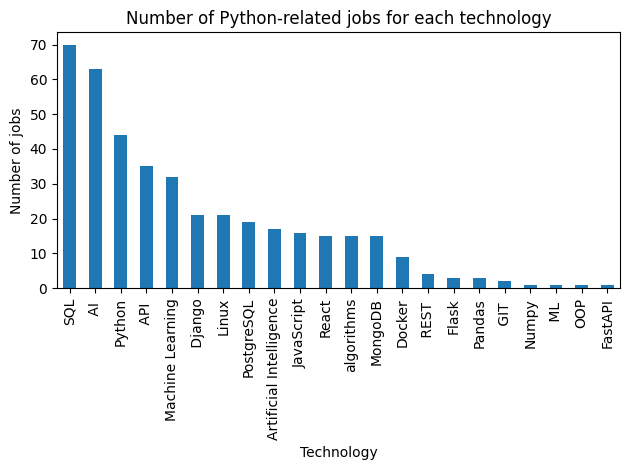

In [5]:
techs_count.plot(
    kind="bar", 
    xlabel="Technology", 
    ylabel="Number of jobs",
    title="Number of Python-related jobs for each technology",
)
plt.tight_layout()
today = pd.to_datetime("today").strftime("%Y-%m-%d")
filename = f"techs_count_{today}.png"
plt.savefig(f"graphs-archive/{filename}")
print(f"Figure saved as {filename}")

plt.show()
